In [1]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

import pandas as pd
import numpy as np

# data_handle = 'cond1_pat59to74'
# data_handle = 'cond1_pat1to81'
# data_handle = 'cond1_oversampled'
data_handle = 'cond1_pat1to81_outrmv'
# data_handle = 'cond1_oversampled_outrmv'
pca_mode = 'pca'

inter_dir = '../../data/intermediates'
data_subdir = pca_mode + '_' + data_handle
data_dir = inter_dir + '/' + data_subdir

fX_test = data_dir + '/X_test_' + data_handle + '.csv'
fX_train = data_dir + '/X_train_' + data_handle + '.csv'
fy_test = data_dir + '/y_test_' + data_handle + '.csv'
fy_train = data_dir + '/y_train_' + data_handle + '.csv'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
X_test = np.loadtxt(fX_test, delimiter=',')
X_train = np.loadtxt(fX_train, delimiter=',')
y_test = pd.read_csv(fy_test)
y_train = pd.read_csv(fy_train)

print('---- X_test ----')
print(X_test, '\n')
print('---- X_train ----')
print(X_train, '\n')
print('---- y_test ----')
display(y_test)
print('---- y_train ----')
display(y_train)

---- X_test ----
[[ 1.95611172e+01 -1.49551678e+01  3.21832733e+01 -8.75355142e+00
  -1.16538065e+01  1.58245670e+00  7.93682518e+00 -6.59694834e+00
  -7.29609463e+00  1.84508347e+01  4.19017109e+00  1.19273166e+01
  -1.76343528e+01 -8.65830324e+00 -4.48444433e+00  6.27329433e+00
   6.82403916e+00  3.97599409e+00  8.42142326e-01 -3.23345400e+00
   1.37074820e+00  1.28031872e+01 -9.05001405e-01  2.18884588e+00
  -1.25631061e+01  4.82990503e+00  7.20745070e+00 -1.90613808e+00
  -3.92240411e+00  1.12903126e+01 -2.88045589e+00  2.58474769e+00
   1.00507422e+01  7.65619575e+00 -1.79175577e+00 -6.70620644e+00
  -8.27851557e-01 -9.01989839e+00 -4.64018147e+00  1.00577753e+00
   6.00039911e+00 -4.43140019e+00 -8.34071160e+00  4.43584312e+00
   7.78588920e+00 -6.79876461e+00 -1.29766615e+01  5.94929209e+00
  -7.46379825e+00 -1.12904537e+01  1.15225110e+01 -1.27173884e+00
   1.30414505e+01  7.37728776e+00  1.64463880e+00 -8.60793547e-01
   1.36810683e-01 -4.21404221e+00  1.07604028e+00 -6.173005

,subject,class
0,63,0
1,53,1
2,52,1
3,29,1
4,40,1
5,46,1
6,2,0
7,37,1
8,77,1
9,38,1


---- y_train ----


,subject,class
0,49,1
1,34,1
2,25,1
3,18,0
4,41,1
5,74,1
6,28,1
7,65,0
8,8,0
9,24,0


In [4]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train['class'])

CPU times: user 1.36 s, sys: 533 ms, total: 1.9 s
Wall time: 4.48 s


RandomForestClassifier(class_weight='balanced')

In [5]:
y_pred = rf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test['class'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [7]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(1, 500), 'max_depth': randint(1, 20)}

rf = RandomForestClassifier(class_weight="balanced")
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

rand_search.fit(X_train, y_train['class'])

CPU times: user 10.2 s, sys: 95.5 ms, total: 10.3 s
Wall time: 10.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10ecfcb80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x124ef1700>})

In [8]:
best_est = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 305}


In [9]:
%%time
rf_best = RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'])
# rf_best = RandomForestClassifier(max_depth=100, n_estimators=4)  # inconsistent results upon repeat
rf_best.fit(X_train, y_train['class'])
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test['class'], y_pred_best)
print("Best accuracy:", accuracy_best)

Best accuracy: 0.75
CPU times: user 562 ms, sys: 8.67 ms, total: 570 ms
Wall time: 575 ms


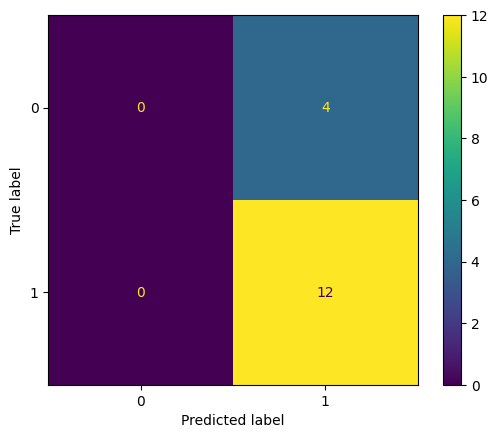

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test['class'], y_pred_best)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [11]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test['class'], y_pred)
recall = recall_score(y_test['class'], y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", 2*precision*recall/(precision + recall))

Precision: 0.75
Recall: 1.0
F1: 0.8571428571428571


In [ ]:
# F- I-- N---